# Evaluating the performance of a model

There are several scores Ragas developed to evaluate model performance.

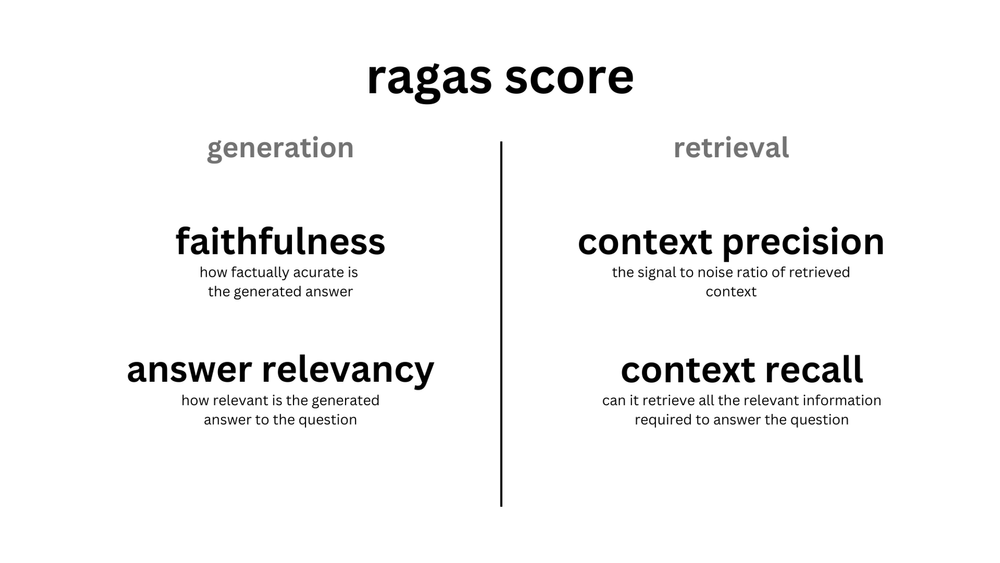

Below, we have a predefined set of questions and generated answers.
For each question and generated answer, we also have the 
1. the contexts provided
2. the ground truth answer (actual correct answer)

In [9]:
import os
import sys
from pathlib import Path

from pathlib import Path
import sys
sys.path.append(
    str(Path.cwd().parents[1])
);

from datasets import Dataset
from langchain_community.document_loaders import DirectoryLoader
from langchain_community.embeddings import OllamaEmbeddings
from langchain_community.llms import Ollama
from ragas import evaluate
from ragas.metrics import answer_correctness, faithfulness

from utilities.ollama import verify_ollama_model_present

MODEL_NAME = "openchat"
# https://ollama.com/library/openchat

evaluator_llm = Ollama(model=MODEL_NAME)
embeddings = OllamaEmbeddings(model=MODEL_NAME)

data_samples = {
    'question': ['When was the first super bowl?', 'Who won the most super bowls?'],
    'answer': ['The first superbowl was held on Jan 15, 1967', 'The most super bowls have been won by The New England Patriots'],
    'contexts': [['The First AFL-NFL World Championship Game was an American football game played on January 15, 1967, at the Los Angeles Memorial Coliseum in Los Angeles,'],
                 ['The Green Bay Packers...Green Bay, Wisconsin.', 'The Packers compete...Football Conference']],
    'ground_truth': ['The first superbowl was held on January 15, 1967', 'The New England Patriots have won the Super Bowl a record six times']
}

dataset = Dataset.from_dict(data_samples)


# make sure that the ollama is available to use locally (might need to ollama pull)
verify_ollama_model_present("openchat")

score = evaluate(dataset,
                 metrics=[faithfulness, answer_correctness],
                 llm=evaluator_llm,
                 embeddings=embeddings,
                 )
score.to_pandas()

print(score)

validating model exists...


Evaluating: 100%|██████████| 4/4 [00:17<00:00,  4.28s/it]


{'faithfulness': 0.5000, 'answer_correctness': 0.8328}


In [10]:
score.to_pandas()

,question,answer,contexts,ground_truth,faithfulness,answer_correctness
0,When was the first super bowl?,"The first superbowl was held on Jan 15, 1967",[The First AFL-NFL World Championship Game was...,"The first superbowl was held on January 15, 1967",1.0,0.995546
1,Who won the most super bowls?,The most super bowls have been won by The New ...,"[The Green Bay Packers...Green Bay, Wisconsin....",The New England Patriots have won the Super Bo...,0.0,0.669971
